# Learning Fixpoints

We want to learn a function $f$ such that $f(x) = x$ for an initial $x$.

## Related Work

- Random NNs: https://arxiv.org/pdf/1710.06570.pdf
- Attractors: https://en.wikipedia.org/wiki/Attractor

In [1]:
!pip install keras

In [2]:
import numpy as np
import matplotlib.pylab as plt
from keras.models import Model
from keras.layers import Input, Dense

Using TensorFlow backend.


In [3]:
DIM = 2

Setup the model.

In [4]:
def make_model():
  a = Input(shape=(DIM,))
  b = Dense(DIM)(a)
  model = Model(inputs=a, outputs=b)
  model.compile('sgd', 'mse')
  return model

In [5]:
model = make_model()

We use a random initial point $x$, and train the network by minimizing $(f(x) - x)^2$.

In [6]:
x = []
x.append(np.random.uniform(size=(1, DIM)))
for _ in range(100):
  new_x = model.predict(x[-1])
  x.append(new_x)
  model.fit(x[-1], new_x, verbose=0)

This is the resulting trajectory of $x$, plotted by dimension.

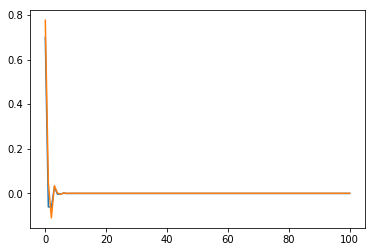

In [7]:
plt.plot([e[0][0] for e in x])
plt.plot([e[0][1] for e in x])

Same data, in 2D.

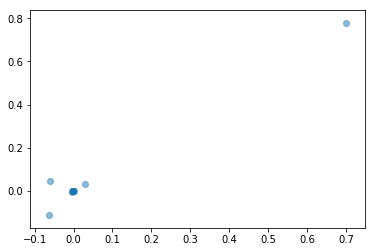

In [8]:
plt.scatter([e[0][0] for e in x], [e[0][1] for e in x], alpha=.5)

This is what happens if we initialize the recurrent function application for new points $x$.

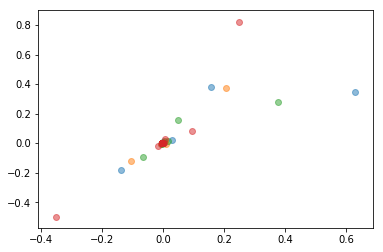

In [9]:
for _ in range(4):
  x = []
  x.append(np.random.uniform(size=(1, DIM)))
  for _ in range(100):
    new_x = model.predict(x[-1])
    x.append(new_x)

  plt.scatter([e[0][0] for e in x], [e[0][1] for e in x], alpha=.5)

## Untrained Network with Random Weights

It's tempting to credit the learning process for this effect, but not training at all yields similar results.

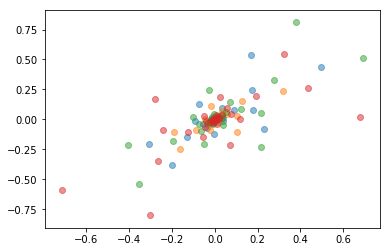

In [10]:
model = make_model()

for _ in range(4):
  x = []
  x.append(np.random.uniform(size=(1, DIM)))
  for _ in range(100):
    new_x = model.predict(x[-1])
    x.append(new_x)

  plt.scatter([e[0][0] for e in x], [e[0][1] for e in x], alpha=.5)

More layers, more parameters, same effect.

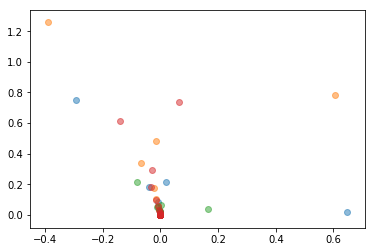

In [11]:
a = Input(shape=(DIM,))
h = Dense(4)(a)
b = Dense(DIM)(h)
model = Model(inputs=a, outputs=b)
model.compile('sgd', 'mse')

for _ in range(4):
  x = []
  x.append(np.random.uniform(size=(1, DIM)))
  for _ in range(100):
    new_x = model.predict(x[-1])
    x.append(new_x)
  
  plt.scatter([e[0][0] for e in x], [e[0][1] for e in x], alpha=.5)

## Multiple Untrained Networks

We can build a chain of networks and use the prediction of a network as the input of the next network. We can do this in a circular manner.

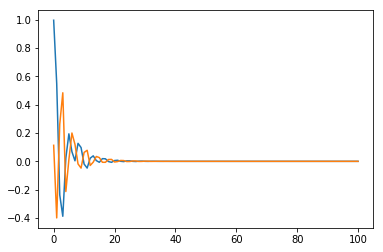

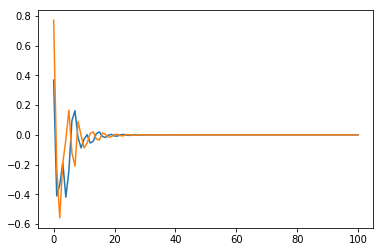

In [12]:
n_models = 4
models = [make_model() for _ in range(n_models)]

for _ in range(2):
  x = []
  x.append(np.random.uniform(size=(1, DIM)))
  for i in range(100):
    new_x = models[i % n_models].predict(x[-1])
    x.append(new_x)

  plt.figure()
  plt.plot([e[0][0] for e in x])
  plt.plot([e[0][1] for e in x])
    
  # plt.scatter([e[0][0] for e in x], [e[0][1] for e in x], alpha=.5)

## Adding Offset

We can add an offset to each prediction.

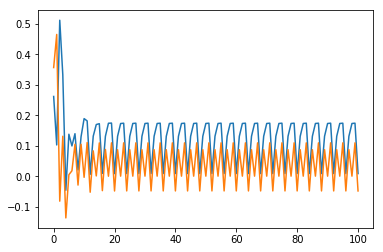

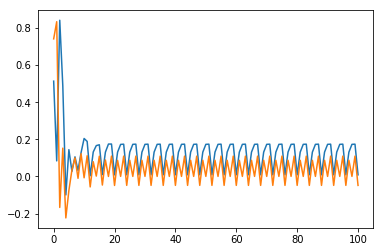

In [14]:
n_models = 4
models = [make_model() for _ in range(n_models)]

offset = .1

for _ in range(2):
  x = []
  x.append(np.random.uniform(size=(1, DIM)))
  for i in range(100):
    new_x = models[i % n_models].predict(x[-1])
    new_x += offset
    x.append(new_x)

  plt.figure()
  plt.plot([e[0][0] for e in x])
  plt.plot([e[0][1] for e in x])

## Next

- Is a trained net also an attractor?
- How do trained or random density nets behave?